# Import packages


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erfc

# ASK-2 (i.e., BPSK) over AWGN

$Q(x)=\tfrac12\operatorname{erfc}(x/\sqrt{2})$

BPSK BER is:

$Q\!\big(\sqrt{2E_b/N_0}\big)=\tfrac12\operatorname{erfc}\!\big(\sqrt{E_b/N_0}\big)$.


In [ ]:
def calculate_ask2_bep(eb_no_db):
    # Convert Eb/No from dB to linear scale
    snr_linear = 10 ** (eb_no_db / 10)

    # 2-ASK (BPSK)
    bep_ask2_awgn = 0.5 * erfc(np.sqrt(snr_linear))

    return bep_ask2_awgn

In [ ]:
df = pd.read_csv("project/ber/uncoded_ask2_awgn.csv")
uncoded_ask2_awgn_snr_db = df["snr_db"]
uncoded_ask2_awgn_ber = df["ber"]

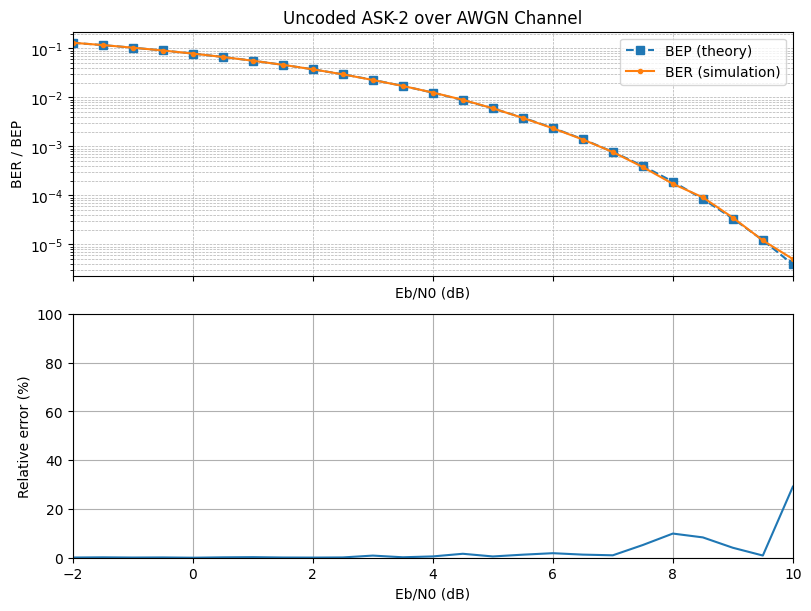

In [118]:
eps = 1e-15
bep_ask2_awgn = calculate_ask2_bep(uncoded_ask2_awgn_snr_db)
rel_err = (
    100 * np.abs(uncoded_ask2_awgn_ber - bep_ask2_awgn) / np.maximum(bep_ask2_awgn, eps)
)


fig, ax = plt.subplots(2, 1, figsize=(8, 6), constrained_layout=True, sharex=True)
ax[0].set_title("Uncoded ASK-2 over AWGN Channel")
ax[0].semilogy(uncoded_ask2_awgn_snr_db, bep_ask2_awgn, "s--", label="BEP (theory)")
ax[0].semilogy(
    uncoded_ask2_awgn_snr_db, uncoded_ask2_awgn_ber, ".-", label="BER (simulation)"
)
ax[0].set_xlabel("Eb/N0 (dB)")
ax[0].set_ylabel("BER / BEP")
ax[0].grid(True, which="both", linestyle="--", linewidth=0.5)
ax[0].set_xlim(-2, 10)
ax[0].legend()
ax[1].plot(uncoded_ask2_awgn_snr_db, rel_err)
ax[1].set_xlabel("Eb/N0 (dB)")
ax[1].set_ylabel("Relative error (%)")
ax[1].grid(True)
ax[1].set_xlim(-2, 10)
ax[1].set_ylim([0, 100])
plt.show()

# ASK-4 with Gray coding (i.e., M-PAM with M=4)

Standard M-PAM Gray-coded bit error expression:

$$
P_b=\frac{2(M-1)}{M\log_2 M}Q\!\left(\sqrt{\frac{6\log_2 M}{M^2-1}\frac{E_b}{N_0}}\right)
\;=\;\frac{M-1}{M\log_2 M}\,\operatorname{erfc}\!\left(\sqrt{\frac{3\log_2 M}{M^2-1}\frac{E_b}{N_0}}\right).
$$


In [87]:
def calculate_ask4_bep(eb_no_db):

    # Convert Eb/No from dB to linear scale
    snr_linear = 10 ** (eb_no_db / 10)

    # 4-ASK with Gray coding
    M = 4
    bep_ask4_gray_awgn = ((M - 1) / (M * np.log2(M))) * erfc(
        np.sqrt((3 * np.log2(M) / (M**2 - 1)) * snr_linear)
    )

    # 4-ASK (without Gray coding)
    bep_ask4_natural_awgn = 0.5 * erfc(
        np.sqrt((3 * np.log2(M) / (M**2 - 1)) * snr_linear)
    )

    return bep_ask4_gray_awgn, bep_ask4_natural_awgn

In [88]:
df = pd.read_csv("project/ber/uncoded_ask4_gray_awgn.csv")
uncoded_ask4_gray_awgn_snr_db = df["snr_db"]
uncoded_ask4_gray_awgn_ber = df["ber"]

df = pd.read_csv("project/ber/uncoded_ask4_natural_awgn.csv")
uncoded_ask4_natural_awgn_snr_db = df["snr_db"]
uncoded_ask4_natural_awgn_ber = df["ber"]

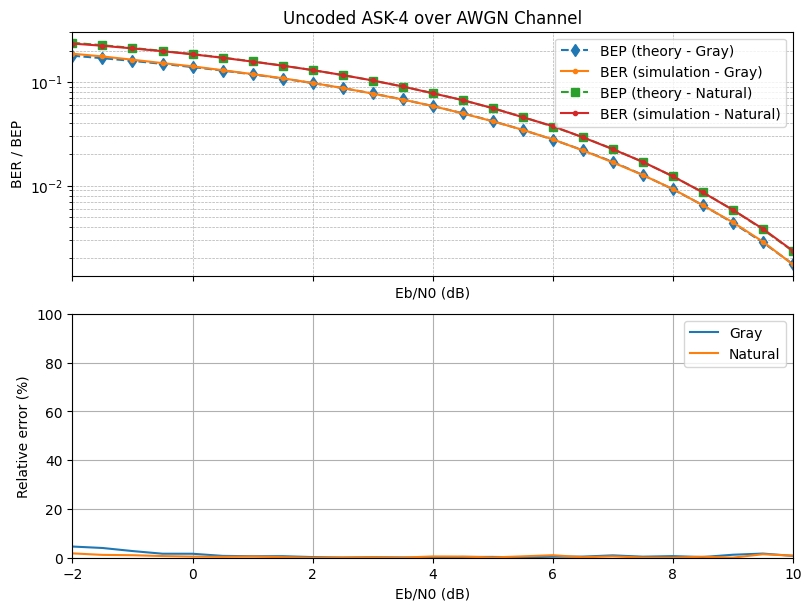

In [119]:
eps = 1e-15
bep_ask4_gray_awgn, _ = calculate_ask4_bep(uncoded_ask4_gray_awgn_snr_db)
_, bep_ask4_natural_awgn = calculate_ask4_bep(uncoded_ask4_natural_awgn_snr_db)
rel_err_gray = (
    100
    * np.abs(uncoded_ask4_gray_awgn_ber - bep_ask4_gray_awgn)
    / np.maximum(bep_ask4_gray_awgn, eps)
)
rel_err_natural = (
    100
    * np.abs(uncoded_ask4_natural_awgn_ber - bep_ask4_natural_awgn)
    / np.maximum(bep_ask4_natural_awgn, eps)
)
fig, ax = plt.subplots(2, 1, figsize=(8, 6), constrained_layout=True, sharex=True)
ax[0].set_title("Uncoded ASK-4 over AWGN Channel")
ax[0].semilogy(
    uncoded_ask4_gray_awgn_snr_db,
    bep_ask4_gray_awgn,
    "d--",
    label="BEP (theory - Gray)",
)
ax[0].semilogy(
    uncoded_ask4_gray_awgn_snr_db,
    uncoded_ask4_gray_awgn_ber,
    ".-",
    label="BER (simulation - Gray)",
)
ax[0].semilogy(
    uncoded_ask4_natural_awgn_snr_db,
    bep_ask4_natural_awgn,
    "s--",
    label="BEP (theory - Natural)",
)
ax[0].semilogy(
    uncoded_ask4_natural_awgn_snr_db,
    uncoded_ask4_natural_awgn_ber,
    ".-",
    label="BER (simulation - Natural)",
)
ax[0].set_xlabel("Eb/N0 (dB)")
ax[0].set_ylabel("BER / BEP")
ax[0].grid(True, which="both", linestyle="--", linewidth=0.5)
ax[0].set_xlim(-2, 10)
ax[0].legend()
ax[1].plot(uncoded_ask4_gray_awgn_snr_db, rel_err_gray, label="Gray")
ax[1].plot(uncoded_ask4_natural_awgn_snr_db, rel_err_natural, label="Natural")
ax[1].set_xlabel("Eb/N0 (dB)")
ax[1].set_ylabel("Relative error (%)")
ax[1].grid(True)
ax[1].set_xlim(-2, 10)
ax[1].set_ylim([0, 100])
ax[1].legend()
plt.show()

# Concolutional Coding (K=7)


In [111]:
df = pd.read_csv("project/ber/conv_k7_r12_ask2_awgn.csv")
conv_k7_r12_ask2_awgn_snr_db = df["snr_db"]
conv_k7_r12_ask2_awgn_ber = df["ber"]

df = pd.read_csv("project/ber/conv_k7_r12_ask4_gray_awgn.csv")
conv_k7_r12_ask4_gray_awgn_snr_db = df["snr_db"]
conv_k7_r12_ask4_gray_awgn_ber = df["ber"]

df = pd.read_csv("project/ber/conv_k7_r12_ask4_natural_awgn.csv")
conv_k7_r12_ask4_natural_awgn_snr_db = df["snr_db"]
conv_k7_r12_ask4_natural_awgn_ber = df["ber"]

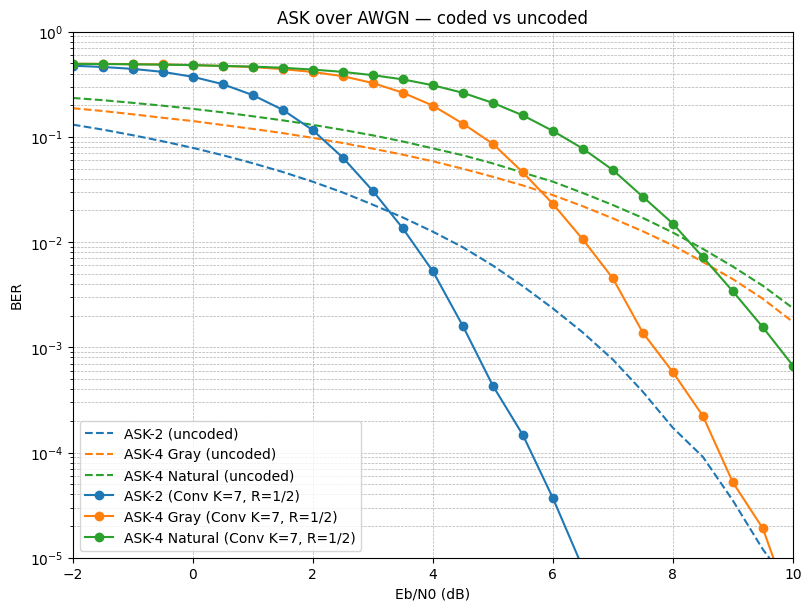

In [112]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
ax.set_title("ASK over AWGN — coded vs uncoded")

# Color by modulation
colors = {
    "ask2": "C0",
    "ask4_gray": "C1",
    "ask4_nat": "C2",
}

# Uncoded = dashed
ax.semilogy(uncoded_ask2_awgn_snr_db,         uncoded_ask2_awgn_ber,         "--", color=colors["ask2"],      label="ASK-2 (uncoded)")
ax.semilogy(uncoded_ask4_gray_awgn_snr_db,    uncoded_ask4_gray_awgn_ber,    "--", color=colors["ask4_gray"], label="ASK-4 Gray (uncoded)")
ax.semilogy(uncoded_ask4_natural_awgn_snr_db, uncoded_ask4_natural_awgn_ber, "--", color=colors["ask4_nat"],  label="ASK-4 Natural (uncoded)")

# Coded = solid
ax.semilogy(conv_k7_r12_ask2_awgn_snr_db,         conv_k7_r12_ask2_awgn_ber,         "o-", color=colors["ask2"],      label="ASK-2 (Conv K=7, R=1/2)")
ax.semilogy(conv_k7_r12_ask4_gray_awgn_snr_db,    conv_k7_r12_ask4_gray_awgn_ber,    "o-", color=colors["ask4_gray"], label="ASK-4 Gray (Conv K=7, R=1/2)")
ax.semilogy(conv_k7_r12_ask4_natural_awgn_snr_db, conv_k7_r12_ask4_natural_awgn_ber, "o-", color=colors["ask4_nat"],  label="ASK-4 Natural (Conv K=7, R=1/2)")

ax.set_xlabel("Eb/N0 (dB)")
ax.set_ylabel("BER")
ax.set_xlim(-2, 10)
ax.set_ylim(1e-5, 1)
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
ax.legend()
plt.show()
